In [1]:
import PIL
import numpy as np
import cv2
from PIL import Image
from scipy.ndimage.morphology import binary_fill_holes
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.morphology import binary_closing, binary_dilation, disk

In [2]:
def keep_tile(tile, tile_size, tissue_threshold):
        """
        Determine if a tile should be kept.
        
        Args:
            - tile: A PIL Image object of the slide tile
            - tile_size: The width and height of a square tile to be generated.
            - tissue_threshold: Tissue percentage threshold.
        Returns:
            A Boolean indicating whether or not a tile should be kept.

        Check 0:
            The tile must be the specified height and width

        Check 1:
            - Convert image to greyscale with 0 = background, 1 = tissue
            - Canny edge detect
            - Binary dilation followed by erosion
            - Binary dilation to fill gaps in tissue
            - Calcualte tissue precentage and test against given minumum tissue value

        Check 2:
            - Convert tile to optical density space
            - Threshold values
            - Binary dilation followed by erosion
            - Binary dilation to fill gaps in tissue
            - Calcualte tissue precentage and test against given minumum tissue value
        """

        tile = np.array(tile)

        if tile.shape[0:2] == (tile_size, tile_size):
            tile_orig = tile
            tile = rgb2gray(tile)
            tile = 1 - tile
            tile = canny(tile)
            tile = binary_closing(tile, disk(10))
            tile = binary_dilation(tile, disk(10))
            tile = binary_fill_holes(tile)

            percentage_1 = tile.mean()
            check_1 = percentage_1 >= tissue_threshold

            
            tile = tile_orig.astype(np.float64)
            tile = -np.log((tile+1)/240) #convert to optical density
            beta = 0.15
            tile = np.min(tile, axis=2) >= beta
            tile = binary_closing(tile, disk(2))
            tile = binary_dilation(tile, disk(2))
            tile = binary_fill_holes(tile)
            percentage_2 = tile.mean()
            check_2 = percentage_2 >= tissue_threshold
            
            print(f"Check 1: {percentage_1} | {check_1}")
            print(f"Check 2: {percentage_2} | {check_2}")
            
            return check_1 and check_2
        else:
            return False

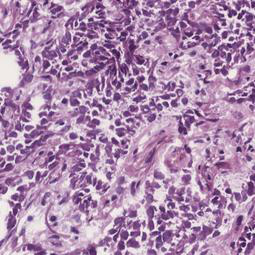

Check 1: 0.9982622068435217 | True
Check 2: 0.9870357554786621 | True
Keep True


In [3]:
im = Image.open("img/background/test_1.jpeg")
display(im)

keep = keep_tile(np.array(im), 255, 0.9)
print(f"Keep {keep}")

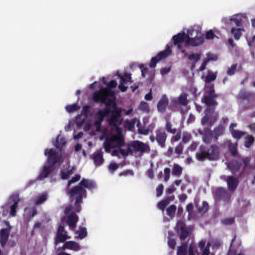

Check 1: 0.695840061514802 | False
Check 2: 0.6086889657823914 | False
Keep False


In [4]:
im = Image.open("img/background/test_2.jpeg")
display(im)

keep = keep_tile(np.array(im), 255, 0.9)
print(f"Keep {keep}")

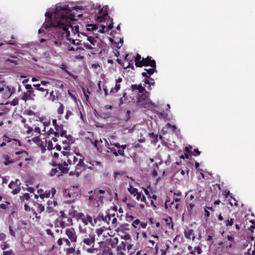

Check 1: 0.7676585928489043 | False
Check 2: 0.713925413302576 | False
Keep False


In [5]:
im = Image.open("img/background/test_3.jpeg")
display(im)

keep = keep_tile(np.array(im), 255, 0.9)
print(f"Keep {keep}")

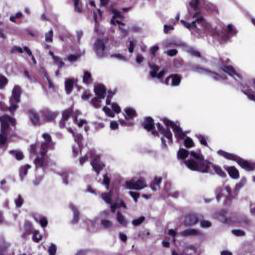

Check 1: 0.9442983467896963 | True
Check 2: 0.7983391003460207 | False
Keep False


In [6]:
im = Image.open("img/background/test_4.jpeg")
display(im)

keep = keep_tile(np.array(im), 255, 0.9)
print(f"Keep {keep}")

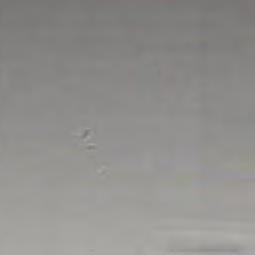

Check 1: 0.014640522875816993 | False
Check 2: 1.0 | True
Keep False


In [7]:
im = Image.open("img/background/test_5.jpeg")
display(im)

keep = keep_tile(np.array(im), 255, 0.9)
print(f"Keep {keep}")